# Import Relevant Libraries

In [3]:
# (1): NumPy:
import numpy as np

# (2): Matplotlib:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams.update(plt.rcParamsDefault)

# (3): Pandas:
import pandas as pd

ImportError: DLL load failed while importing _path: The specified module could not be found.

# Begin Analysis

We need a function that can scan a dataset (`.csv`) and figure out what the kinematic configurations were. Essentially, all we need to do is scan through the columns that refer to $x_{B}$, $Q^{2}$, and $-t$ and figure out the distinct values that are present in those columns. That is quite a simple function to code. Let's ask ChatGPT to do it:

**Me**:

> I have a `.csv` dataset that contains three columns of interest. Using Pandas, I need a single function that takes as input a Pandas column and returns a list of all the distinct numbers that are present in that column. As an explicit example, suppose the column named `x_B` has 1000 entries, but only 5 of them are actually unique -- let's say they're 0.5, 1.3, 1.75, 2.4, and 2.78. How would I code this function?

**ChatGPT**:

> You can achieve this using the unique() method provided by Pandas. Here's how you can write the function:
```python
import pandas as pd

def get_distinct_numbers(column):
    unique_numbers = column.unique()
    return unique_numbers.tolist()

# Example usage:
# Assuming df is your DataFrame and 'x_B' is the column of interest
distinct_numbers_x_B = get_distinct_numbers(df['x_B'])
print(distinct_numbers_x_B)
```
> This function takes a Pandas column as input, uses the unique() method to get the distinct values, and then converts the result to a list using tolist(). You can replace 'x_B' with the actual name of your column in the DataFrame.


Let's see if this works. First, we import the data we are using. To do that, we use that function we've used seven thousand times already:

In [20]:
def read_csv_file_with_pandas(name_of_csv_file: str) -> pd.DataFrame:
    """
    Description
    --------------
    We are using Pandas to read the .csv file. If this works, then the
    function will return the 

    Parameters
    --------------
    name_of_csv_file: str
    
    Returns
    --------------
    pandas_read_csv: Pandas DF

    Function Flow
    --------------
    (1): Try to read the CSV with Pandas. If it works,
        it works. YAY! If it don't, then return None.
    
    Notes
    --------------
    """
    try:
        pandas_read_csv = pd.read_csv(name_of_csv_file)
        return pandas_read_csv
    except Exception as E:
        print(f"> Error reading the .csv file with Pandas:\n> {E}")
        return None

Let's read in the kinematic data:

In [21]:
jlab_pandas_df = read_csv_file_with_pandas('jlab_kinematics.csv')
jlab_pandas_df.head()

k    QQ    x_b      t  phi_x         F   sigmaF       ReH   ReE  \
0  5.75  1.82  0.343 -0.172    7.5  0.120053  0.00492 -0.992404 -0.31   
1  5.75  1.82  0.343 -0.172   22.5  0.114969  0.00468 -0.992404 -0.31   
2  5.75  1.82  0.343 -0.172   37.5  0.106078  0.00420 -0.992404 -0.31   
3  5.75  1.82  0.343 -0.172   52.5  0.095266  0.00396 -0.992404 -0.31   
4  5.75  1.82  0.343 -0.172   67.5  0.084249  0.00360 -0.992404 -0.31   

       ReHt      dvcs  
0 -0.396272  0.017761  
1 -0.396272  0.017761  
2 -0.396272  0.017761  
3 -0.396272  0.017761  
4 -0.396272  0.017761

Now, let's try what ChatGPT suggested. As you can see, the name of the column we were talking about is `"x_b"`.

In [22]:
def get_distinct_numbers(column):
    unique_numbers = column.unique()
    return unique_numbers.tolist()

# Example usage:
# Assuming df is your DataFrame and 'x_B' is the column of interest
distinct_numbers_x_B = get_distinct_numbers(jlab_pandas_df['x_b'])
print(distinct_numbers_x_B)


[0.3429999947547912, 0.3680000007152557, 0.375, 0.3790000081062317, 0.3810000121593475, 0.3449999988079071, 0.3630000054836273, 0.3709999918937683, 0.3729999959468841, 0.3779999911785126, 0.3919999897480011, 0.3980000019073486, 0.4000000059604645, 0.4009999930858612, 0.335999995470047, 0.3420000076293945, 0.3650000095367431, 0.363999992609024, 0.367000013589859, 0.3689999878406524, 0.3700000047683716, 0.3720000088214874, 0.4830000102519989, 0.4839999973773956, 0.4850000143051147, 0.4970000088214874, 0.5009999871253967, 0.5040000081062317, 0.5059999823570251, 0.5080000162124634, 0.4819999933242798, 0.4860000014305115, 0.4939999878406524, 0.4979999959468841, 0.4990000128746032, 0.6100000143051147, 0.6119999885559082, 0.6150000095367432, 0.6169999837875366, 0.6159999966621399, 0.6079999804496765, 0.609000027179718, 0.6110000014305115, 0.6129999756813049, 0.1260000020265579, 0.1539999991655349, 0.1550000011920929, 0.1840000003576278, 0.1850000023841858, 0.2140000015497207, 0.21500000357627

That seemed to do the trick. We can now immediately apply this function to the other columns of kinematic data, namely $Q^{2}$ and $-t$.

In [23]:
distinct_kinematic_Q_squared_ranges = get_distinct_numbers(jlab_pandas_df['QQ'])
distinct_kinematic_x_Bjorken_ranges = get_distinct_numbers(jlab_pandas_df['x_b'])
distinct_kinematic_t_ranges = get_distinct_numbers(jlab_pandas_df['t'])

print(f"> Phase space contains {len(distinct_kinematic_Q_squared_ranges)} Q-squared points, {len(distinct_kinematic_x_Bjorken_ranges)} xB points, and {len(distinct_kinematic_t_ranges)} t points.")

> Phase space contains 95 Q-squared points, 75 xB points, and 85 t points.


That's quite a lot of points. Upon revisiting the numbers present in these columns, we find that there isn't much difference really between a number for $x_{B}$ like 0.3680000007152557 and 0.375. So, perhaps what we should do is limit our search for *all* unique numbers in the DataFrame and instead search for unique numbers within a particular significance, say 0.001. I am imagining that there's a Pandas operation that enables us to do this in one fell swoop, but we can also ask ChatGPT.

**Me**:

> Thanks for the great function. Let's make it a little more complicated. It turned out that several of the unique numbers in the column differ by one part in perhaps 1000. I would now like to focus on those numbers present in the column that are unique to only within 1 in 1000. As an example, we need a function that no longer considers a the numbers `1.2345` and `1.2346` as unique. Recall that we're still using the Pandas architecture. Please write a function that performs this operation. The result should still be that list.

**ChatGPT**:

> To achieve this refinement, you can modify the function to round the numbers in the column to a certain decimal place before finding the distinct values. Here's how you can do it:

```python
import pandas as pd

def get_distinct_numbers_rounded(column, decimal_places=3):
    rounded_numbers = column.round(decimal_places)
    unique_rounded_numbers = rounded_numbers.unique()
    return unique_rounded_numbers.tolist()

# Example usage:
# Assuming df is your DataFrame and 'x_B' is the column of interest
distinct_numbers_x_B_rounded = get_distinct_numbers_rounded(df['x_B'], decimal_places=3)
print(distinct_numbers_x_B_rounded)
```

> In this version, decimal_places determines the level of precision to which the numbers will be rounded before considering them as distinct. Adjust decimal_places as needed for your specific requirements.

Let's now see if this works.

In [24]:
def get_distinct_numbers_rounded(column, decimal_places=3):
    rounded_numbers = column.round(decimal_places)
    unique_rounded_numbers = rounded_numbers.unique()
    return unique_rounded_numbers.tolist()

# Example usage:
# Assuming df is your DataFrame and 'x_B' is the column of interest
distinct_numbers_x_B_rounded = get_distinct_numbers_rounded(jlab_pandas_df['x_b'], decimal_places=3)
print(distinct_numbers_x_B_rounded)

[0.343, 0.368, 0.375, 0.379, 0.381, 0.345, 0.363, 0.371, 0.373, 0.378, 0.392, 0.398, 0.4, 0.401, 0.336, 0.342, 0.365, 0.364, 0.367, 0.369, 0.37, 0.372, 0.483, 0.484, 0.485, 0.497, 0.501, 0.504, 0.506, 0.508, 0.482, 0.486, 0.494, 0.498, 0.499, 0.61, 0.612, 0.615, 0.617, 0.616, 0.608, 0.609, 0.611, 0.613, 0.126, 0.154, 0.155, 0.184, 0.185, 0.214, 0.215, 0.244, 0.245, 0.274, 0.275, 0.301, 0.304, 0.305, 0.333, 0.335, 0.393, 0.399, 0.391, 0.433, 0.449, 0.461, 0.43, 0.451, 0.475, 0.359, 0.361, 0.357, 0.356, 0.358, 0.36]


Quickly comparing the number of unique quantities:

In [25]:
print(len(get_distinct_numbers(jlab_pandas_df['x_b'])))
print(len(get_distinct_numbers_rounded(jlab_pandas_df['x_b'], decimal_places = 3)))
print(len(get_distinct_numbers_rounded(jlab_pandas_df['x_b'], decimal_places = 2)))
print(len(get_distinct_numbers_rounded(jlab_pandas_df['x_b'], decimal_places = 1)))

75
75
30
6


As we specify to lesser precision, we are cutting off more and more of the available data that we have, and that is what we expected. So, that seems to be good to go.

Let us do this now for $Q^{2}$ and $t$.

In [26]:
print(len(get_distinct_numbers_rounded(jlab_pandas_df['QQ'], decimal_places = 3)))
print(len(get_distinct_numbers_rounded(jlab_pandas_df['t'], decimal_places = 3)))
print(len(get_distinct_numbers_rounded(jlab_pandas_df['x_b'], decimal_places = 3)))

print(len(get_distinct_numbers_rounded(jlab_pandas_df['QQ'], decimal_places = 2)))
print(len(get_distinct_numbers_rounded(jlab_pandas_df['t'], decimal_places = 2)))
print(len(get_distinct_numbers_rounded(jlab_pandas_df['x_b'], decimal_places = 2)))

print(len(get_distinct_numbers_rounded(jlab_pandas_df['QQ'], decimal_places = 1)))
print(len(get_distinct_numbers_rounded(jlab_pandas_df['t'], decimal_places = 1)))
print(len(get_distinct_numbers_rounded(jlab_pandas_df['x_b'], decimal_places = 1)))

print(len(get_distinct_numbers_rounded(jlab_pandas_df['QQ'], decimal_places = 0)))
print(len(get_distinct_numbers_rounded(jlab_pandas_df['t'], decimal_places = 0)))
print(len(get_distinct_numbers_rounded(jlab_pandas_df['x_b'], decimal_places = 0)))

95
83
75
87
50
30
34
13
6
9
2
2


The reason this is important is because it will actually determine how many plots we can make. For example, even if we are considering a single damn decimal place to identify "unique" numbers within this dataset, it will still lead to $34 \times 13 \times 6 = 2652$ different kinematic settings, which is that many possible fits of $\sigma$ vs. $\phi$. That is definitely not ideal.

Now, usually what is done with these plots is that the values of $Q^{2}$ and $x_{B}$ are fixed, and then we make several plots that show the functional dependence of $\sigma$ on $\phi$ at different values of $t$. So, what we really need to specify is, for a given tuple of fixed $Q^{2}$ and $x_{B}$, we need to figure out how many values of $t$ there are, and then extract those corresponding indices in the DataFrame. How would ChatGPT do this? Let's ask it, because this is a pretty simple idea:

**Me**:

> Let's go back to the idea of getting the "distinct" numbers in a Pandas DataFrame. Now, I need to obtain another piece of information: The indices of that particular set of numbers. Let me be more specific. I have three columns in Dataframe: `"x_b", "QQ", "t"`. What I need you to do is to write a function that, once provided a FIXED and unique value for `"x_b"` and `"QQ"`, finds the range of indices for which those values are found. Remember: You need to use the idea that we are considering several numbers to be the same. That is, if I provide the values `x_b = 0.184` and `QQ = 2.87`, then you need to find the range of indices that corresponds to those values of `x_B` and `QQ` that are "unique" up to that specified precision. The reason I am concerned about this is because, if I provide the value `x_b = 0.184`, then, because the DataFrame has such high precision, there will be NO matches with this exact number.

**ChatGPT**:

> You can achieve this by rounding the values in the DataFrame before comparing them to the fixed and unique values. Here's a function that does that:

```python
import pandas as pd

def find_indices_for_values(df, x_b_value, QQ_value, decimal_places=3):
    # Round the values in the DataFrame to the specified decimal places
    rounded_df = df.round({ 'x_b': decimal_places, 'QQ': decimal_places })
    
    # Find the indices where the rounded values match the fixed and unique values
    indices = rounded_df[(rounded_df['x_b'] == x_b_value) & (rounded_df['QQ'] == QQ_value)].index
    
    # Get the range of indices
    start_index = indices.min() if not indices.empty else None
    end_index = indices.max() if not indices.empty else None
    
    return start_index, end_index

# Example usage:
# Assuming df is your DataFrame with columns 'x_b', 'QQ', and 't'
start_idx, end_idx = find_indices_for_values(df, x_b_value=0.184, QQ_value=2.87, decimal_places=3)
print(f"Range of indices for x_b = 0.184 and QQ = 2.87: {start_idx} to {end_idx}")
```

> This function first rounds the values in the DataFrame to the specified decimal places, then finds the indices where the rounded values match the fixed and unique values for x_b and QQ. It returns the range of indices corresponding to those values. Adjust decimal_places as needed for your precision requirements.

We will now test to see if this does the trick. It definitely does look a little suspicious...

In [27]:
def find_indices_for_values(df, x_b_value, QQ_value, decimal_places = 3):
    # Round the values in the DataFrame to the specified decimal places
    rounded_df = df.round({ 'x_b': decimal_places, 'QQ': decimal_places })
    
    # Find the indices where the rounded values match the fixed and unique values
    indices = rounded_df[(rounded_df['x_b'] == x_b_value) & (rounded_df['QQ'] == QQ_value)].index
    
    # Get the range of indices
    start_index = indices.min() if not indices.empty else None
    end_index = indices.max() if not indices.empty else None
    
    return start_index, end_index

# Example usage:
# Assuming df is your DataFrame with columns 'x_b', 'QQ', and 't'
start_idx, end_idx = find_indices_for_values(jlab_pandas_df, x_b_value = 0.184, QQ_value = 2.87, decimal_places=3)
print(f"Range of indices for x_b = 0.184 and QQ = 2.87: {start_idx} to {end_idx}")


Range of indices for x_b = 0.184 and QQ = 2.87: None to None


Well, it doesn't seem to work, but there might indeed not be these numbers for $x_{B}$ and $Q^{2}$ in the dataset. So, let's pull this apart and verify that it can work.

My first question is, Does `df.round()` actually do the trick?

In [28]:
rounded_jlab_data = jlab_pandas_df.round({ 'x_b': 2, 'QQ': 2 })
rounded_jlab_data.head()

k    QQ   x_b      t  phi_x         F   sigmaF       ReH   ReE  \
0  5.75  1.82  0.34 -0.172    7.5  0.120053  0.00492 -0.992404 -0.31   
1  5.75  1.82  0.34 -0.172   22.5  0.114969  0.00468 -0.992404 -0.31   
2  5.75  1.82  0.34 -0.172   37.5  0.106078  0.00420 -0.992404 -0.31   
3  5.75  1.82  0.34 -0.172   52.5  0.095266  0.00396 -0.992404 -0.31   
4  5.75  1.82  0.34 -0.172   67.5  0.084249  0.00360 -0.992404 -0.31   

       ReHt      dvcs  
0 -0.396272  0.017761  
1 -0.396272  0.017761  
2 -0.396272  0.017761  
3 -0.396272  0.017761  
4 -0.396272  0.017761

That does seem to work. So, in other words, what ChatGPT suggested involves mutating the original DataFrame. That seems okay for now, but we might not want this later.

Secondly, we see if indexing this new DataFrame can do the trick. I think it probably can, but we'll check. 

In [29]:
rounded_jlab_data[(rounded_jlab_data['x_b'] == 0.34) & (rounded_jlab_data['QQ'] == 1.82)].index

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23],
      dtype='int64')

That was successful. These tests give more credence to the idea that ChatGPT can actually code things correctly and we're being stupid. So, I'm inclined to believe that extracting the `.min()` and `.max()` methods do what they do.

So, let's now just try the function one more time:

In [30]:
start_idx, end_idx = find_indices_for_values(jlab_pandas_df, x_b_value = 0.34, QQ_value = 1.8, decimal_places = 2)
print(f"Range of indices for x_b = 0.34 and QQ = 1.82: {start_idx} to {end_idx}")

Range of indices for x_b = 0.34 and QQ = 1.82: None to None


The reason we wanted that function was so that we could now pull out all the unique values of $t$ like so:

In [31]:
jlab_pandas_df['t'][start_idx:end_idx]

0      -0.172
1      -0.172
2      -0.172
3      -0.172
4      -0.172
        ...  
4675   -0.304
4676   -0.304
4677   -0.304
4678   -0.304
4679   -0.304
Name: t, Length: 4680, dtype: float64

We need to test whether or not this can work if there are different values of $t$ that pop up here.

In [32]:
jlab_pandas_df[500:510]

k    QQ    x_b        t  phi_x         F   sigmaF       ReH   ReE  \
500  7.383  3.17  0.363 -0.21085  307.5  0.045978  0.00176 -1.180453 -0.31   
501  7.383  3.17  0.363 -0.21085  322.5  0.049722  0.00191 -1.180453 -0.31   
502  7.383  3.17  0.363 -0.21085  337.5  0.052776  0.00209 -1.180453 -0.31   
503  7.383  3.17  0.363 -0.21085  352.5  0.054513  0.00214 -1.180453 -0.31   
504  7.383  3.17  0.363 -0.29665    7.5  0.049777  0.00215 -1.197058 -0.31   
505  7.383  3.17  0.363 -0.29665   22.5  0.046459  0.00200 -1.197058 -0.31   
506  7.383  3.17  0.363 -0.29665   37.5  0.041239  0.00190 -1.197058 -0.31   
507  7.383  3.17  0.363 -0.29665   52.5  0.035732  0.00162 -1.197058 -0.31   
508  7.383  3.17  0.363 -0.29665   67.5  0.030900  0.00132 -1.197058 -0.31   
509  7.383  3.17  0.363 -0.29665   82.5  0.027050  0.00119 -1.197058 -0.31   

         ReHt      dvcs  
500 -0.360229  0.014116  
501 -0.360229  0.014116  
502 -0.360229  0.014116  
503 -0.360229  0.014116  
504 -0.294028  0.010484  
505 -0.294028  0.010484  
506 -0.294028  0.010484  
507 -0.294028  0.010484  
508 -0.294028  0.010484  
509 -0.294028  0.010484

In [33]:
xb_value_1 = 0.363	
qq_value_1 = 3.17
number_of_decimal_places = 3

starting_index_1, ending_index_1 = find_indices_for_values(
    jlab_pandas_df, 
    x_b_value = xb_value_1, 
    QQ_value = qq_value_1, 
    decimal_places = number_of_decimal_places)

print(f"Range of indices for x_b = {xb_value_1} and QQ = {qq_value_1}: {starting_index_1} to {ending_index_1}")

jlab_pandas_df['t'][starting_index_1:ending_index_1]

get_distinct_numbers(jlab_pandas_df['t'][starting_index_1:ending_index_1])

Range of indices for x_b = 0.363 and QQ = 3.17: 480 to 527


[-0.2108500003814697, -0.2966499924659729]

What the above says is that there are two unique numbers for $t$ at fixed values of $Q^{2} = 3.17$ and $x_{B} = 0.363$. This is important because the number of unique numbers for $t$ (up to some significance) will determine the number of plots that we create. (We are going to foliate through $t$ at a fixed $Q^{2}$ and $x_{B}$, if that makes any sense.)

The next task is quite simple. All we need to do is code up a decent-looking Matplotlib graph that will plot $\sigma$ vs. $\phi$ for a particular fixed value of the kinematic quantities, $Q^{2}$, $t$, and $x_{B}$.

> I need to make N subplots based on the number of "unique" values that are in a particular array. So, for example, if I have an array `[4, 4, 4, 5, 5, 6]`, then I need to make 3 subplots. I know I can do this with the `plt.subplots()` functionality, but here is how I'm currently creating figures and plots:

```python
# (1): Initialize the Figure:
    figure_object = plt.figure(
        figsize = FIGURE_DIMENSION,
        dpi = _FIGURE_DOTS_PIXELS_PER_INCH,
        facecolor = "#e8e8e8"
    )

    # (2): Add an Axis to the Main Figure:
    AXES_ONE_LEFT = 0.
    AXES_ONE_BOTTOM = 0.
    AXES_ONE_WIDTH = 1.0 * _FIGURE_X_AXIS_WIDTH_IN_INCHES
    AXES_ONE_HEIGHT = 1.0 * _FIGURE_Y_AXIS_HEIGHT_IN_INCHES
    axes_object = figure_object.add_axes(
        (AXES_ONE_LEFT, AXES_ONE_BOTTOM, AXES_ONE_WIDTH, AXES_ONE_HEIGHT)
        )
```

> As you can see, I add axes separately. Is there any way I can still use this kind of code but prepare for the construction of N subplots?

In [63]:
def construct_cross_section_versus_phi(
    fixed_kinematic_Q_squared: float,
    fixed_kinematic_x_Bjorken: float,
    fixed_kinematic_t_momentum: pd.DataFrame,
    cross_section_column: pd.DataFrame,
    cross_section_errors_column: pd.DataFrame,
    phi_azimuth_column: pd.DataFrame
    ) -> plt.figure:
    """
    Description
    --------------
    Construct a lot of F (cross-section) versus phi at 
    some predetermined, fixed kinematics.

    Parameters
    --------------
    fixed_kinematic_Q_squared: float
    
    fixed_kinematic_x_Bjorken: float

    fixed_kinematic_t_momentum: pd.DataFrame

    cross_section_column: pd.DataFrame

    cross_section_errors_column: pd.DataFrame

    phi_azimuth_column: pd.DataFrame
    
    Returns
    --------------
    figure_object: plt.figure

    Function Flow
    --------------
    
    Notes
    --------------
    """
    plt.rcParams["mathtext.fontset"] = "cm"

    _FIGURE_X_AXIS_WIDTH_IN_INCHES = 2.
    _FIGURE_Y_AXIS_HEIGHT_IN_INCHES = 2.

    _FIGURE_DOTS_PIXELS_PER_INCH = 100.0

    unique_values_of_t = get_distinct_numbers(fixed_kinematic_t_momentum)
    number_of_unique_t_values = len(unique_values_of_t)
    print(f"> Found {number_of_unique_t_values} t values. Now enlisting {number_of_unique_t_values} subplots...")

    FIGURE_DIMENSION = (number_of_unique_t_values * _FIGURE_X_AXIS_WIDTH_IN_INCHES, _FIGURE_Y_AXIS_HEIGHT_IN_INCHES)

    # (1): Initialize the Figure:
    figure_object = plt.figure(
        figsize = FIGURE_DIMENSION,
        dpi = _FIGURE_DOTS_PIXELS_PER_INCH,
        facecolor = "#e8e8e8"
    )

    # (2): Add an Axis to the Main Figure:
    axes_objects = []

    for t_value_index in range(number_of_unique_t_values):
        AXES_ONE_LEFT = t_value_index * _FIGURE_X_AXIS_WIDTH_IN_INCHES
        AXES_ONE_BOTTOM = 0.
        AXES_ONE_WIDTH = 1.0 * _FIGURE_X_AXIS_WIDTH_IN_INCHES
        AXES_ONE_HEIGHT = 1.0 * _FIGURE_Y_AXIS_HEIGHT_IN_INCHES
        axes_object = figure_object.add_axes(
            (AXES_ONE_LEFT, AXES_ONE_BOTTOM, AXES_ONE_WIDTH, AXES_ONE_HEIGHT)
            )
        axes_objects.append(axes_object)

        # (3): Configure the Axes Objects:
        axes_object.set_xlabel('X Label', fontfamily='serif')
        axes_object.set_ylabel('Y Label', fontfamily='serif')
        
        # Set x axis ticks
        axes_object.tick_params(axis = 'x', direction = 'in', which = 'both', top = True)
        axes_object.tick_params(axis = 'x', which = 'major', length = 5, width = 0.5)
        axes_object.tick_params(axis = 'x', which = 'minor', length = 2.5, width = 0.5)
        axes_object.minorticks_on()

        # Set y axis ticks
        axes_object.tick_params(axis = 'y', direction='in', which = 'both', right = True)
        axes_object.tick_params(axis = 'y', which = 'major', length = 5, width = 0.5)
        axes_object.tick_params(axis = 'y', which = 'minor', length = 2.5, width = 0.5)
        axes_object.minorticks_on()
        
        # (4): Plot the data:
        axes_object.errorbar(
            x = phi_azimuth_column,
            y = cross_section_column,
            yerr = cross_section_errors_column,
            color = 'black',
            linestyle = '', 
            marker = 'o',
            markersize = 1.0,
            ecolor = 'black',
            elinewidth = 0.5,
            capsize = 1)
    
        # (5): Annotate the figure:

        # (5.1): Prepare the annotation text:
        annotation_Q_squared = r"$Q^{{2}} = {} \quad \text{{GeV}}^{{2}}$".format(fixed_kinematic_Q_squared)
        annotation_x_Bjorken = r"$x_{{B}} = {} $".format(fixed_kinematic_x_Bjorken)
        annotation_t = r"$t = {} \quad \text{{GeV}} $".format(unique_values_of_t[t_value_index])

        # (5.2): Figure out the positions of the annotations by getting the max and min of both axes:
        maximum_cross_section_value = np.max(cross_section_column)
        minimum_cross_section_value = np.min(cross_section_column)
        middle_cross_section_value = (maximum_cross_section_value + minimum_cross_section_value) / 2
        maximum_phi_value = np.max(phi_azimuth_column)
        minimum_phi_value = np.min(phi_azimuth_column)
        middle_phi_value = (maximum_phi_value + minimum_phi_value) / 2

        # (5.3): Assign the positions of the annotations:
        increment = middle_cross_section_value / 10
        xy_position_of_Q_squared_annotation = (middle_phi_value, middle_cross_section_value)
        xy_position_of_x_Bjorken_annotation = (middle_phi_value, middle_cross_section_value - increment)
        xy_position_of_t_momentum_annotation = (middle_phi_value, middle_cross_section_value - 2 * increment)

        plt.xlabel(r"$\phi [\text{deg}]$", fontsize = 19)
        plt.ylabel(r"$d^{4} \sigma [\text{nb}/\text{GeV}^{{4}}]$", fontsize = 19)
        plt.annotate(
            annotation_Q_squared,
            xy_position_of_Q_squared_annotation,
            fontsize = 15
        )
        plt.annotate(
            annotation_x_Bjorken,
            xy_position_of_x_Bjorken_annotation,
            fontsize = 15
        )
        plt.annotate(
            annotation_t,
            xy_position_of_t_momentum_annotation,
            fontsize = 15
        )
        
    return figure_object

Now, we just try it out. It should be decent. First, we'll try it with all the $\phi \pm \sigma_{\phi}$:

In [59]:
construct_cross_section_versus_phi(
    jlab_pandas_df["QQ"][0],
    jlab_pandas_df["x_b"][0],
    jlab_pandas_df["t"],
    jlab_pandas_df["F"],
    jlab_pandas_df["sigmaF"],
    jlab_pandas_df["phi_x"]
)

> Found 85 t values. Now enlisting 85 subplots...


KeyboardInterrupt: 

Now, we're going to try to slice the data according to a specific value of $Q^{2}$ and $x_{B}$ using the functions we coded earlier. If we use only the first values that appear in the Dataframe, then we'll only have 23 points. (That means, for the values of $Q^{2}$ and $x_{B}$ that appear at index 0 in the DataFrame, up to significance of 0.01, we saw earlier that there were only 23 entries that corresponded to those values.) Recall the following:

In [39]:
test_Q_squared_value = rounded_jlab_data["QQ"][0]
test_x_B_value = rounded_jlab_data["x_b"][0]

start_index_for_t_values, end_index_for_t_values = find_indices_for_values(
    rounded_jlab_data,
    x_b_value = test_x_B_value,
    QQ_value = test_Q_squared_value,
    decimal_places = 2
)

print(f"> Starts at {start_index_for_t_values} and goes to {end_index_for_t_values}")

jlab_pandas_df["t"][start_index_for_t_values:end_index_for_t_values]

> Starts at 0 and goes to 23


0    -0.172
1    -0.172
2    -0.172
3    -0.172
4    -0.172
5    -0.172
6    -0.172
7    -0.172
8    -0.172
9    -0.172
10   -0.172
11   -0.172
12   -0.172
13   -0.172
14   -0.172
15   -0.172
16   -0.172
17   -0.172
18   -0.172
19   -0.172
20   -0.172
21   -0.172
22   -0.172
Name: t, dtype: float64

That's good to know, but it's $\phi$ that we want to index.

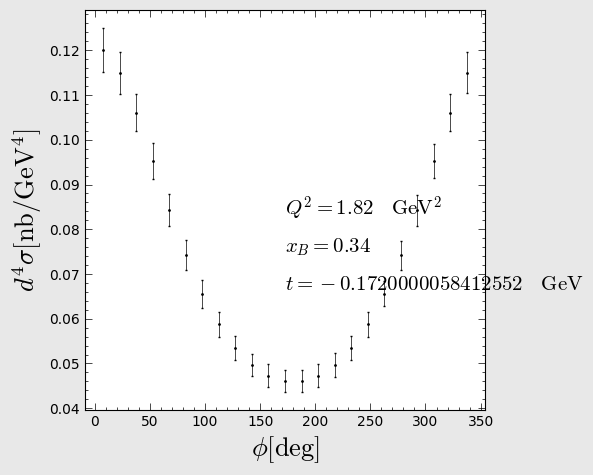

In [40]:
test_Q_squared_value = rounded_jlab_data["QQ"][0]
test_x_B_value = rounded_jlab_data["x_b"][0]

start_index_for_t_values, end_index_for_t_values = find_indices_for_values(
    rounded_jlab_data,
    x_b_value = test_x_B_value,
    QQ_value = test_Q_squared_value,
    decimal_places = 3
)

construct_cross_section_versus_phi(
    test_Q_squared_value,
    test_x_B_value,
    rounded_jlab_data["t"][0],
    rounded_jlab_data["F"][start_index_for_t_values:end_index_for_t_values],
    rounded_jlab_data["sigmaF"][start_index_for_t_values:end_index_for_t_values],
    rounded_jlab_data["phi_x"][start_index_for_t_values:end_index_for_t_values]
)

In [ ]:
def obtain_width_and_height_of_text_annotation(plot_instance, annotation_text, verbose = True):
    """
    """
    target_annotation = None
    
    try:
        for annotation in plot_instance.gca().texts:
            if annotation.get_text() == annotation_text:
                target_annotation = annotation
                break

        if target_annotation:
            annotation_bounding_box = target_annotation.get_window_extent()

            annotation_box_height = annotation_bounding_box.height
            annotation_box_width = annotation_bounding_box.width

            if verbose:
                print(f"> Textbox height was: {annotation_box_height}")
                print(f"> Textbox width was: {annotation_box_width}")

            return annotation_box_height, annotation_box_width
        
        else:
            if verbose:
                print("> Annotation not found.")

            return 0., 0.
    
    except Exception as ERROR:
        print(f"> Error finding the height and width of the annotation: \n> {ERROR}")
        return 0., 0.
        

Range of indices for x_b = 0.36 and QQ = 3.17: None to None
> Found 2 t values. Now enlisting 2 subplots...


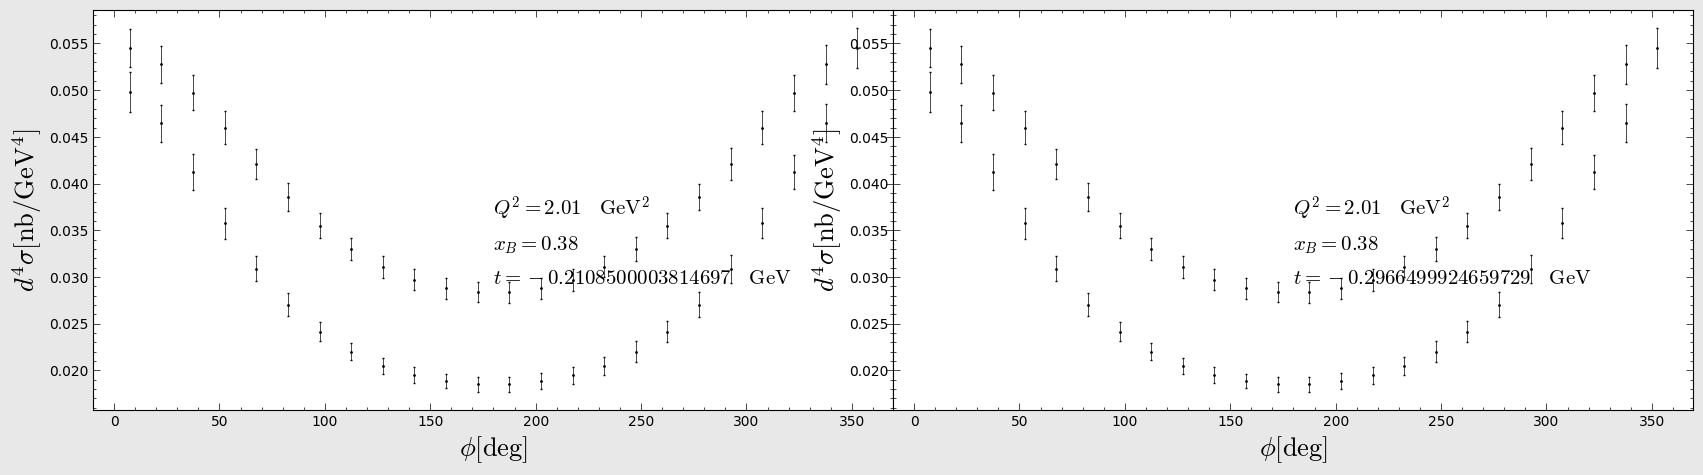

In [64]:
test_Q_squared_value_2 = rounded_jlab_data["QQ"][500]
test_x_B_value_2 = rounded_jlab_data["x_b"][500]

number_of_decimal_places = 3

starting_index_2, ending_index_2 = find_indices_for_values(
    jlab_pandas_df, 
    x_b_value = test_x_B_value_2, 
    QQ_value = test_Q_squared_value_2, 
    decimal_places = number_of_decimal_places)

print(f"Range of indices for x_b = {test_x_B_value_2} and QQ = {test_Q_squared_value_2}: {starting_index_2} to {ending_index_2}")

get_distinct_numbers(jlab_pandas_df['t'][starting_index_2:ending_index_2])

start_index_for_t_values, end_index_for_t_values = find_indices_for_values(
    rounded_jlab_data,
    x_b_value = test_x_B_value_2,
    QQ_value = test_Q_squared_value_2,
    decimal_places = 3
)

construct_cross_section_versus_phi(
    test_Q_squared_value,
    test_x_B_value,
    rounded_jlab_data["t"][start_index_for_t_values:end_index_for_t_values],
    rounded_jlab_data["F"][start_index_for_t_values:end_index_for_t_values],
    rounded_jlab_data["sigmaF"][start_index_for_t_values:end_index_for_t_values],
    rounded_jlab_data["phi_x"][start_index_for_t_values:end_index_for_t_values]
)

In [ ]:
def analyze_kinematic_data(
        incoming_data_file: str,
        verbose = True) -> None:
    """
    """

    # (1): Scrub the incoming data file:
    if incoming_data_file == None:

        if verbose:
            print(f"> ")
        return None

In [4]:
ax = plt.figure().add_subplot(projection='3d')


ax.scatter(jlab_pandas_df["QQ"], jlab_pandas_df["t"], jlab_pandas_df["x_b"])

NameError: name 'plt' is not defined